This is an introductory guide to some useful functions with the `Tables` class. It should be used as a reference rather than a comprehensive guide. For some other useful tutorials, check out:

- [From the Datascience textbook](http://data8.org/text/1_data.html#tables)
- [A few example notebooks](https://github.com/deculler/TableDemos)
- [The official API documentation](http://data8.org/datascience/)

In [18]:
import datascience as ds
import numpy as np
import pandas as pd
import string

# Creating a Table from scratch

In order to create a vanilla Table object, you need two things: a list of data columns and a set of labels for those columns.


In [19]:
nfeats, npoints = 10, 100
data = list(np.random.randn(nfeats, npoints))
labels = [string.ascii_lowercase[i] for i in range(nfeats)]
table = ds.Table(data, labels=labels)

You can also supply a dictionary where keys are labels and values are the column data

In [20]:
data_dict = {i: dat for i, dat in zip(labels, data)}
table = ds.Table.from_columns_dict(data_dict)

If you want to create a table by passing rows instead of columns, use the `from_rows` method

In [21]:
data_rows = list(np.random.randn(npoints, nfeats))
table = ds.Table.from_rows(data_rows, column_labels=labels)

# Viewing Data

In a jupyter notebook, simply run a cell with a table in it, and it will display in nice HTML. However, it will cut off rows that are too long to be displayed

In [22]:
table

a,b,c,d,e,f,g,h,i,j
1.47322,0.656063,-0.401252,0.719005,-1.04886,1.25265,0.433674,-0.422546,0.808726,-0.584839
1.22433,1.68251,0.0884474,0.387752,0.29966,-1.04284,-0.760973,-1.54238,-0.340201,2.43176
-0.374095,-0.872324,-0.844742,-0.639322,-0.668143,1.36785,0.89169,0.534444,0.808748,-0.649596
0.514309,-1.35711,0.480351,-0.836941,1.36574,-0.923039,0.325919,0.433147,0.421811,-0.576981
0.114981,2.08516,-1.64722,-0.279241,-0.271861,0.1985,-0.107857,0.307659,1.64217,0.993
-2.73727,1.98559,-0.177422,0.464792,0.111792,1.6894,0.250159,-0.584032,-0.14129,-0.58728
-0.796424,-0.923416,0.200698,0.949148,0.389305,-0.318975,-0.360773,0.360731,0.156811,0.821194
1.0247,0.395183,-0.999285,0.610134,-0.605347,-2.4624,2.32099,-0.604794,1.28987,-0.325868
-0.454209,-0.45885,-0.584588,-0.533117,1.2416,0.773302,-0.995275,0.35998,-1.68374,1.01766
1.2669,0.590678,-0.0331148,-0.969507,1.3537,1.82663,-0.62562,-0.465854,-0.392034,0.186124


In [23]:
# Printing does the same, but with text output
print(table)

a         | b         | c          | d         | e         | f         | g         | h         | i         | j
1.47322   | 0.656063  | -0.401252  | 0.719005  | -1.04886  | 1.25265   | 0.433674  | -0.422546 | 0.808726  | -0.584839
1.22433   | 1.68251   | 0.0884474  | 0.387752  | 0.29966   | -1.04284  | -0.760973 | -1.54238  | -0.340201 | 2.43176
-0.374095 | -0.872324 | -0.844742  | -0.639322 | -0.668143 | 1.36785   | 0.89169   | 0.534444  | 0.808748  | -0.649596
0.514309  | -1.35711  | 0.480351   | -0.836941 | 1.36574   | -0.923039 | 0.325919  | 0.433147  | 0.421811  | -0.576981
0.114981  | 2.08516   | -1.64722   | -0.279241 | -0.271861 | 0.1985    | -0.107857 | 0.307659  | 1.64217   | 0.993
-2.73727  | 1.98559   | -0.177422  | 0.464792  | 0.111792  | 1.6894    | 0.250159  | -0.584032 | -0.14129  | -0.58728
-0.796424 | -0.923416 | 0.200698   | 0.949148  | 0.389305  | -0.318975 | -0.360773 | 0.360731  | 0.156811  | 0.821194
1.0247    | 0.395183  | -0.999285  | 0.610134  | -0.605347 | -2.

In [24]:
# You can return a table as text
print('TEXT:\n', table.as_text()[:1000])

# Or as html
print('\n\nHTML:\n', table.as_html()[:1000])

TEXT:
 a          | b           | c           | d          | e           | f          | g           | h          | i           | j
1.47322    | 0.656063    | -0.401252   | 0.719005   | -1.04886    | 1.25265    | 0.433674    | -0.422546  | 0.808726    | -0.584839
1.22433    | 1.68251     | 0.0884474   | 0.387752   | 0.29966     | -1.04284   | -0.760973   | -1.54238   | -0.340201   | 2.43176
-0.374095  | -0.872324   | -0.844742   | -0.639322  | -0.668143   | 1.36785    | 0.89169     | 0.534444   | 0.808748    | -0.649596
0.514309   | -1.35711    | 0.480351    | -0.836941  | 1.36574     | -0.923039  | 0.325919    | 0.433147   | 0.421811    | -0.576981
0.114981   | 2.08516     | -1.64722    | -0.279241  | -0.271861   | 0.1985     | -0.107857   | 0.307659   | 1.64217     | 0.993
-2.73727   | 1.98559     | -0.177422   | 0.464792   | 0.111792    | 1.6894     | 0.250159    | -0.584032  | -0.14129    | -0.58728
-0.796424  | -0.923416   | 0.200698    | 0.949148   | 0.389305    | -0.318975  | -0.

You can also just access the column labels

In [25]:
cols = table.column_labels
print(cols)

('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j')


Transposing your data will not change your column labels. Instead, it will transpose the data __within__ each column.

In [26]:
table.T

a,b,c,d,e,f,g,h,i,j
[ 1.47321821e+00 1.22432507e+00 -3.74095075e-01 5. ...,[ 6.56062831e-01 1.68250572e+00 -8.72324404e-01 -1. ...,[-0.4012516 0.08844736 -0.84474159 0.48035136 -1.6472 ...,[ 0.71900519 0.38775179 -0.63932194 -0.8369414 -0.2792 ...,[-1.04885623 0.29966006 -0.66814331 1.36574489 -0.2718 ...,[ 1.25264625 -1.04283559 1.36785104 -0.92303931 0.1984 ...,[ 0.43367446 -0.760973 0.89168957 0.32591865 -0.1078 ...,[-0.42254567 -1.54238251 0.53444362 0.43314672 0.3076 ...,[ 0.80872565 -0.34020128 0.80874775 0.42181067 1.6421 ...,[-0.5848387 2.43176149 -0.64959618 -0.57698051 0.9930 ...


You can also sort a table by the values in some column.

In [27]:
table.sort('b')

a,b,c,d,e,f,g,h,i,j
0.631133,-2.52612,-1.14383,1.81571,0.121088,-1.07192,-0.740637,-0.126649,-0.123995,0.367591
-1.53046,-2.17092,0.294224,0.20077,2.23185,-0.0368275,-0.794108,0.0763012,1.42545,-0.287857
0.905952,-1.87998,0.531758,-0.271506,0.525678,0.540884,0.687275,-0.325107,0.278496,1.07534
0.807724,-1.69117,0.505064,-0.0850315,0.894317,-0.177871,-1.40489,0.495216,0.803181,0.997855
0.46686,-1.62605,-0.578019,-0.801059,0.485576,-1.58896,1.74624,0.610381,1.24042,-0.139482
-0.624877,-1.50471,0.495772,1.536,-0.25071,0.497601,-1.67993,1.98363,-0.329533,-2.09749
1.0814,-1.38552,0.702214,-0.920861,0.917501,0.197329,-1.22076,1.20039,-1.6018,0.998539
0.39218,-1.36009,-0.573986,-0.930537,1.20452,0.167886,0.276411,0.207481,0.120143,-0.891598
0.514309,-1.35711,0.480351,-0.836941,1.36574,-0.923039,0.325919,0.433147,0.421811,-0.576981
0.140846,-1.26951,0.528703,-1.47878,-0.994941,-0.596272,-1.00333,0.468386,-1.14248,-0.549852


# Selecting data
The simplest way of selecting data is by pulling out individual columns. This can be done by putting the column name in brackets (similar to how dictionaries work). Note that you must supply a single column name.

In [28]:
print(table['a'][:5])

[ 1.47321821  1.22432507 -0.37409508  0.51430945  0.11498141]


Alternatively, one can select a subset of columns for viewing with the `.select` method. This lets you give multiple column labels:

In [29]:
table.select(['a', 'b'])

a,b
1.47322,0.656063
1.22433,1.68251
-0.374095,-0.872324
0.514309,-1.35711
0.114981,2.08516
-2.73727,1.98559
-0.796424,-0.923416
1.0247,0.395183
-0.454209,-0.45885
1.2669,0.590678


Finally, it is also possible to take specific rows from a table with the `.take` method. Note that this uses a list of row indices.

In [30]:
ix_rows = range(10, 20)
table.take(ix_rows)

a,b,c,d,e,f,g,h,i,j
-0.269377,-1.21258,1.25533,-0.670401,1.6302,-0.703309,0.474981,-1.43215,-1.86944,0.329051
0.748344,0.0032148,-2.43325,2.0554,-0.415948,0.549718,1.29614,0.949623,-0.335367,0.643406
0.606681,-1.25332,-1.0536,-1.65571,-0.67423,1.13089,-0.732706,0.806318,0.168059,-0.656456
0.00172327,-0.889739,-0.676941,0.92932,-0.436971,0.871484,0.250141,1.702,0.734066,-2.56131
-0.549943,-1.24675,-0.279867,-0.336909,-0.713432,1.05668,0.340095,0.58285,-0.0295073,0.270806
0.905952,-1.87998,0.531758,-0.271506,0.525678,0.540884,0.687275,-0.325107,0.278496,1.07534
1.06566,1.67654,-1.05963,0.570834,1.14379,-0.130271,1.34092,1.41367,0.246207,0.620767
-1.6479,-0.652662,0.54276,1.49411,1.3833,-2.01935,-0.504203,0.27486,-0.746772,-0.55384
0.529588,0.897776,1.38103,1.33667,0.136833,1.24665,-0.379145,-0.257535,-1.43249,0.705022
0.0345289,1.42296,-0.0288642,-0.357137,1.14504,-0.22056,-0.775806,1.94606,1.79141,-3.13676


Finally, if you want to forget about the column labels and just treat it as a numpy array, you can use the `.columns` attribute. This will return a list of your column values, which is easily converted into a numpy array (but note that this will also transpose the data)

In [31]:
table_array = table.columns
table_array = np.array(table_array)
print(table_array[:5, :5])
print(type(table_array))

[[ 1.47321821  1.22432507 -0.37409508  0.51430945  0.11498141]
 [ 0.65606283  1.68250572 -0.8723244  -1.35711083  2.08516489]
 [-0.4012516   0.08844736 -0.84474159  0.48035136 -1.64721898]
 [ 0.71900519  0.38775179 -0.63932194 -0.8369414  -0.27924074]
 [-1.04885623  0.29966006 -0.66814331  1.36574489 -0.27186133]]
<class 'numpy.ndarray'>


# Renaming columns
We can quickly rename columns with the `relabel` method

In [32]:
# Note that this will relabel the column *in place*
table_to_relabel = table.copy()
table_to_relabel.relabel('a', 'definitely_not_a')

definitely_not_a,b,c,d,e,f,g,h,i,j
1.47322,0.656063,-0.401252,0.719005,-1.04886,1.25265,0.433674,-0.422546,0.808726,-0.584839
1.22433,1.68251,0.0884474,0.387752,0.29966,-1.04284,-0.760973,-1.54238,-0.340201,2.43176
-0.374095,-0.872324,-0.844742,-0.639322,-0.668143,1.36785,0.89169,0.534444,0.808748,-0.649596
0.514309,-1.35711,0.480351,-0.836941,1.36574,-0.923039,0.325919,0.433147,0.421811,-0.576981
0.114981,2.08516,-1.64722,-0.279241,-0.271861,0.1985,-0.107857,0.307659,1.64217,0.993
-2.73727,1.98559,-0.177422,0.464792,0.111792,1.6894,0.250159,-0.584032,-0.14129,-0.58728
-0.796424,-0.923416,0.200698,0.949148,0.389305,-0.318975,-0.360773,0.360731,0.156811,0.821194
1.0247,0.395183,-0.999285,0.610134,-0.605347,-2.4624,2.32099,-0.604794,1.28987,-0.325868
-0.454209,-0.45885,-0.584588,-0.533117,1.2416,0.773302,-0.995275,0.35998,-1.68374,1.01766
1.2669,0.590678,-0.0331148,-0.969507,1.3537,1.82663,-0.62562,-0.465854,-0.392034,0.186124


You can also relabel multiple columns at once

In [33]:
table_to_relabel.relabel(['b', 'c'], ['totally_not_b', 'maybe_still_c'])

definitely_not_a,totally_not_b,maybe_still_c,d,e,f,g,h,i,j
1.47322,0.656063,-0.401252,0.719005,-1.04886,1.25265,0.433674,-0.422546,0.808726,-0.584839
1.22433,1.68251,0.0884474,0.387752,0.29966,-1.04284,-0.760973,-1.54238,-0.340201,2.43176
-0.374095,-0.872324,-0.844742,-0.639322,-0.668143,1.36785,0.89169,0.534444,0.808748,-0.649596
0.514309,-1.35711,0.480351,-0.836941,1.36574,-0.923039,0.325919,0.433147,0.421811,-0.576981
0.114981,2.08516,-1.64722,-0.279241,-0.271861,0.1985,-0.107857,0.307659,1.64217,0.993
-2.73727,1.98559,-0.177422,0.464792,0.111792,1.6894,0.250159,-0.584032,-0.14129,-0.58728
-0.796424,-0.923416,0.200698,0.949148,0.389305,-0.318975,-0.360773,0.360731,0.156811,0.821194
1.0247,0.395183,-0.999285,0.610134,-0.605347,-2.4624,2.32099,-0.604794,1.28987,-0.325868
-0.454209,-0.45885,-0.584588,-0.533117,1.2416,0.773302,-0.995275,0.35998,-1.68374,1.01766
1.2669,0.590678,-0.0331148,-0.969507,1.3537,1.82663,-0.62562,-0.465854,-0.392034,0.186124


## Boolean indexing

You can't use boolean operators directly with a Table, but it is quite easy to accomplish the same thing by selecting a subset of the data to create boolean masks, then by using the `.where` method.

In [34]:
table > 1

TypeError: unorderable types: Table() > int()

In [35]:
# We'll convert the matrix to an array
msk = np.array(table.columns) > 1
msk[:5, :5]

array([[ True,  True, False, False, False],
       [False,  True, False, False,  True],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False,  True, False]], dtype=bool)

Now we can use the `.where` method, which takes an array with the length == the number of rows in our Table, and returns the rows where the array is == "value" (which defaults to the value `True`)

In [36]:
table.where(msk[0])

a,b,c,d,e,f,g,h,i,j
1.47322,0.656063,-0.401252,0.719005,-1.04886,1.25265,0.433674,-0.422546,0.808726,-0.584839
1.22433,1.68251,0.0884474,0.387752,0.29966,-1.04284,-0.760973,-1.54238,-0.340201,2.43176
1.0247,0.395183,-0.999285,0.610134,-0.605347,-2.4624,2.32099,-0.604794,1.28987,-0.325868
1.2669,0.590678,-0.0331148,-0.969507,1.3537,1.82663,-0.62562,-0.465854,-0.392034,0.186124
1.06566,1.67654,-1.05963,0.570834,1.14379,-0.130271,1.34092,1.41367,0.246207,0.620767
1.02892,0.434381,-1.38518,0.364566,0.694705,-0.0937167,1.04433,-1.00718,-0.075005,-1.28552
1.74898,-0.665449,-2.54059,0.572492,1.8456,-2.54048,-0.506473,-0.860224,-1.28063,-0.0371092
1.31416,1.00748,0.898124,-1.08303,0.378031,-1.10801,0.687217,1.39948,-1.0984,-0.743289
1.0814,-1.38552,0.702214,-0.920861,0.917501,0.197329,-1.22076,1.20039,-1.6018,0.998539
1.05256,0.337919,-0.171616,-0.994148,-1.57571,0.690607,0.886733,2.0747,-1.6401,0.635325


In [37]:
msk_letter = msk.copy().astype(str)
msk_letter[msk] = 'a'
msk_letter[~msk] = 'b'
print(msk_letter[:5, :5])

[['a' 'a' 'b' 'b' 'b']
 ['b' 'a' 'b' 'b' 'a']
 ['b' 'b' 'b' 'b' 'b']
 ['b' 'b' 'b' 'b' 'b']
 ['b' 'b' 'b' 'a' 'b']]


In [38]:
table.where(msk_letter[0], 'b')

a,b,c,d,e,f,g,h,i,j
-0.374095,-0.872324,-0.844742,-0.639322,-0.668143,1.36785,0.89169,0.534444,0.808748,-0.649596
0.514309,-1.35711,0.480351,-0.836941,1.36574,-0.923039,0.325919,0.433147,0.421811,-0.576981
0.114981,2.08516,-1.64722,-0.279241,-0.271861,0.1985,-0.107857,0.307659,1.64217,0.993
-2.73727,1.98559,-0.177422,0.464792,0.111792,1.6894,0.250159,-0.584032,-0.14129,-0.58728
-0.796424,-0.923416,0.200698,0.949148,0.389305,-0.318975,-0.360773,0.360731,0.156811,0.821194
-0.454209,-0.45885,-0.584588,-0.533117,1.2416,0.773302,-0.995275,0.35998,-1.68374,1.01766
-0.269377,-1.21258,1.25533,-0.670401,1.6302,-0.703309,0.474981,-1.43215,-1.86944,0.329051
0.748344,0.0032148,-2.43325,2.0554,-0.415948,0.549718,1.29614,0.949623,-0.335367,0.643406
0.606681,-1.25332,-1.0536,-1.65571,-0.67423,1.13089,-0.732706,0.806318,0.168059,-0.656456
0.00172327,-0.889739,-0.676941,0.92932,-0.436971,0.871484,0.250141,1.702,0.734066,-2.56131


# Chaining these together
Note that you can chain some methods together in order to do lots of things at once. E.g.:

In [39]:
# Select columns a, b, c, and rows where f > 0
table.select(['a', 'b', 'c']).where(table['f'] > 0)

a,b,c
1.47322,0.656063,-0.401252
-0.374095,-0.872324,-0.844742
0.114981,2.08516,-1.64722
-2.73727,1.98559,-0.177422
-0.454209,-0.45885,-0.584588
1.2669,0.590678,-0.0331148
0.748344,0.0032148,-2.43325
0.606681,-1.25332,-1.0536
0.00172327,-0.889739,-0.676941
-0.549943,-1.24675,-0.279867


# Adding new data
It is possible to add a new column directly to our Table object. This is done by passing values that have the same number of rows, along with a column name

In [40]:
table['custom_col'] = table['a'] + 100
table['custom_col']

array([ 101.47321821,  101.22432507,   99.62590492,  100.51430945,
        100.11498141,   97.26273285,   99.20357639,  101.0247046 ,
         99.54579092,  101.26689522,   99.73062311,  100.74834433,
        100.60668138,  100.00172327,   99.45005723,  100.90595238,
        101.06565545,   98.35210305,  100.52958816,  100.03452886,
        101.02892388,  101.74898474,   99.82718256,  100.80772355,
        100.03464553,   98.58183166,   97.6048549 ,   99.40050798,
         98.52235756,  100.26849425,   98.46954432,   98.07375098,
        101.31416336,  100.59396782,  101.08139925,   99.80538453,
         98.99884224,   99.87265496,   99.22125047,  101.0525612 ,
        100.18674993,  100.31758832,   99.81748537,  100.78740252,
        101.16433856,  100.2830118 ,   99.75262539,   99.86589715,
        100.03385524,   98.96160761,   99.05278761,  100.87040532,
        100.3376311 ,   99.2402282 ,   99.55304003,  100.67467987,
        101.08014281,   97.80836176,   99.52501689,  100.19554

In [41]:
table['not_a'] = table['a'] < 0
table

a,b,c,d,e,f,g,h,i,j,custom_col,not_a
1.47322,0.656063,-0.401252,0.719005,-1.04886,1.25265,0.433674,-0.422546,0.808726,-0.584839,101.473,False
1.22433,1.68251,0.0884474,0.387752,0.29966,-1.04284,-0.760973,-1.54238,-0.340201,2.43176,101.224,False
-0.374095,-0.872324,-0.844742,-0.639322,-0.668143,1.36785,0.89169,0.534444,0.808748,-0.649596,99.6259,True
0.514309,-1.35711,0.480351,-0.836941,1.36574,-0.923039,0.325919,0.433147,0.421811,-0.576981,100.514,False
0.114981,2.08516,-1.64722,-0.279241,-0.271861,0.1985,-0.107857,0.307659,1.64217,0.993,100.115,False
-2.73727,1.98559,-0.177422,0.464792,0.111792,1.6894,0.250159,-0.584032,-0.14129,-0.58728,97.2627,True
-0.796424,-0.923416,0.200698,0.949148,0.389305,-0.318975,-0.360773,0.360731,0.156811,0.821194,99.2036,True
1.0247,0.395183,-0.999285,0.610134,-0.605347,-2.4624,2.32099,-0.604794,1.28987,-0.325868,101.025,False
-0.454209,-0.45885,-0.584588,-0.533117,1.2416,0.773302,-0.995275,0.35998,-1.68374,1.01766,99.5458,True
1.2669,0.590678,-0.0331148,-0.969507,1.3537,1.82663,-0.62562,-0.465854,-0.392034,0.186124,101.267,False


# Operations

Tables aren't meant to be operated on directly. Instead, you should operate on their data, e.g.:

In [42]:
table + 2

TypeError: unsupported operand type(s) for +: 'Table' and 'int'

In [43]:
table['a+2'] = table['a'] + 2

Or to do it in place:

In [44]:
table['a'] += 2

It is possible to do some simple statistics on the table object as well.

In [45]:
np.mean(table)

a,b,c,d,e,f,g,h,i,j,custom_col,not_a,a+2
2.0737,-0.00773374,-0.00320692,0.0117359,0.200164,-0.0167261,-0.0966569,0.215736,0.0229408,0.100279,100.074,0.42,2.0737


Or you can apply an arbitrary function to a specific column. Note that this will pass each item to the function, the whole column itself is not passed in one go.

In [46]:
def turn_into_chris(i):
    return '{0}_chris'.format(i)  # This is how we plug a variable into a string

# *each row* of the column will be passed to our function
table['a_chris'] = table.apply(turn_into_chris, 'a')
table['a_chris'][:5]

array(['3.47321820692365_chris', '3.2243250665365037_chris',
       '1.6259049246382662_chris', '2.5143094495267766_chris',
       '2.114981412379621_chris'], 
      dtype='<U26')

# Merging / joining / etc

In [47]:
# First we'll create a column of features that are shared by each table
common_feats = np.array(['feature_{0}'.format(i) for i in range(npoints)])

# We'll create another table and add this feature to the new / old table
table_new = ds.Table.from_columns_dict(
    {string.ascii_uppercase[i]: np.random.randn(npoints) for i in range(5)})
table_new['feature_a'] = common_feats
table['feature_a'] = common_feats

# We'll sort table_new so it's in a different order from `table`
table_new = table_new.sort('D')

Now, we have two tables with different columns __except for one__. We can use the overlapping column to combine these two tables together.

In [48]:
# Note that the fact that table_new was in a different order doesn't matter
table.join('feature_a', table_new)

feature_a,a,b,c,d,e,f,g,h,i,j,custom_col,not_a,a+2,a_chris,A,E,C,D,B
feature_0,3.47322,0.656063,-0.401252,0.719005,-1.04886,1.25265,0.433674,-0.422546,0.808726,-0.584839,101.473,False,3.47322,3.47321820692365_chris,1.51738,-0.823739,-1.07536,0.862783,-0.362529
feature_1,3.22433,1.68251,0.0884474,0.387752,0.29966,-1.04284,-0.760973,-1.54238,-0.340201,2.43176,101.224,False,3.22433,3.2243250665365037_chris,-0.990384,1.72074,0.203869,1.37326,0.790972
feature_10,1.73062,-1.21258,1.25533,-0.670401,1.6302,-0.703309,0.474981,-1.43215,-1.86944,0.329051,99.7306,True,1.73062,1.7306231126510645_chris,-0.330378,0.112631,-1.84218,0.0916585,-0.0360946
feature_11,2.74834,0.0032148,-2.43325,2.0554,-0.415948,0.549718,1.29614,0.949623,-0.335367,0.643406,100.748,False,2.74834,2.7483443300106063_chris,-0.440853,-1.29053,1.08981,0.45597,-0.756351
feature_12,2.60668,-1.25332,-1.0536,-1.65571,-0.67423,1.13089,-0.732706,0.806318,0.168059,-0.656456,100.607,False,2.60668,2.606681378260962_chris,0.594743,1.10643,1.58851,-0.408062,0.696294
feature_13,2.00172,-0.889739,-0.676941,0.92932,-0.436971,0.871484,0.250141,1.702,0.734066,-2.56131,100.002,False,2.00172,2.001723273938175_chris,-0.790639,0.314977,-1.20921,0.586874,0.664407
feature_14,1.45006,-1.24675,-0.279867,-0.336909,-0.713432,1.05668,0.340095,0.58285,-0.0295073,0.270806,99.4501,True,1.45006,1.450057230220187_chris,-1.27573,1.24414,-0.279837,0.0401781,0.972834
feature_15,2.90595,-1.87998,0.531758,-0.271506,0.525678,0.540884,0.687275,-0.325107,0.278496,1.07534,100.906,False,2.90595,2.9059523805439196_chris,1.99979,-0.695669,0.597173,-0.108465,0.296062
feature_16,3.06566,1.67654,-1.05963,0.570834,1.14379,-0.130271,1.34092,1.41367,0.246207,0.620767,101.066,False,3.06566,3.0656554516190875_chris,-0.738152,0.0203097,-0.852526,-0.370657,-1.01418
feature_17,0.352103,-0.652662,0.54276,1.49411,1.3833,-2.01935,-0.504203,0.27486,-0.746772,-0.55384,98.3521,True,0.352103,0.3521030450794833_chris,-1.05396,-0.527269,0.616928,1.30991,-1.36348


# Grouping

Grouping is done by specifying a column to group by. The column's unique values will be calculated, and the rows will be accumulated according to its value in the column specified.

Doing vanilla grouping will simply compile the numbers together in a list:

In [49]:
# First we'll create an arbitrary groups variable
groups = np.zeros(table.num_rows, dtype=bool)
groups[30:] = True

# Return chris or carl depending on true or false
groups = np.where(groups, 'chris', 'carl')

table['groups'] = groups
table.group('groups')

groups,a,b,c,d,e,f,g,h,i,j,custom_col,not_a,a+2,a_chris,feature_a
carl,[ 3.47321821 3.22432507 1.62590492 2.51430945 2.1149 ...,[ 0.65606283 1.68250572 -0.8723244 -1.35711083 2.0851 ...,[-0.4012516 0.08844736 -0.84474159 0.48035136 -1.6472 ...,[ 0.71900519 0.38775179 -0.63932194 -0.8369414 -0.2792 ...,[-1.04885623 0.29966006 -0.66814331 1.36574489 -0.2718 ...,[ 1.25264625 -1.04283559 1.36785104 -0.92303931 0.1984 ...,[ 0.43367446 -0.760973 0.89168957 0.32591865 -0.1078 ...,[-0.42254567 -1.54238251 0.53444362 0.43314672 0.3076 ...,[ 0.80872565 -0.34020128 0.80874775 0.42181067 1.6421 ...,[-0.5848387 2.43176149 -0.64959618 -0.57698051 0.9930 ...,[ 101.47321821 101.22432507 99.62590492 100.51430945 ...,[False False True False False True True False True F ...,[ 3.47321821 3.22432507 1.62590492 2.51430945 2.1149 ...,['3.47321820692365_chris' '3.2243250665365037_chris' '1 ...,['feature_0' 'feature_1' 'feature_2' 'feature_3' 'featur ...
chris,[ 0.46954432 0.07375098 3.31416336 2.59396782 3.0813 ...,[ -2.17092386e+00 1.10851980e-01 1.00748319e+00 -7. ...,[ 0.29422365 1.00595698 0.89812389 1.27536679 0.7022 ...,[ 0.20077001 -0.29245932 -1.08303185 -1.11802139 -0.9208 ...,[ 2.23184798 -0.51429298 0.37803116 -0.27112166 0.9175 ...,[-0.03682746 1.11814618 -1.1080054 -0.18277532 0.1973 ...,[-0.79410753 0.61216201 0.68721713 0.21429825 -1.2207 ...,[ 0.07630124 1.34997052 1.39948236 0.0578844 1.2003 ...,[ 1.42545452 1.83830449 -1.09839581 0.42240687 -1.6017 ...,[-0.28785737 -1.32118022 -0.74328926 0.23362203 0.9985 ...,[ 98.46954432 98.07375098 101.31416336 100.59396782 ...,[ True True False False False True True True True F ...,[ 0.46954432 0.07375098 3.31416336 2.59396782 3.0813 ...,['0.46954432425009496_chris' '0.0737509823604674_chris' ...,['feature_30' 'feature_31' 'feature_32' 'feature_33' 'fe ...


However, we can also automatically apply a function to each group in order to aggregate data more powerfully:

In [50]:
table.group('groups', collect=np.std)

groups,a std,b std,c std,d std,e std,f std,g std,h std,i std,j std,custom_col std,not_a std,a+2 std,a_chris std,feature_a std
carl,1.10283,1.14951,0.934733,0.890443,0.829247,1.20161,0.859353,0.834538,0.922579,1.09391,1.10283,0.489898,1.10283,,
chris,0.980624,0.917625,0.917485,0.988175,0.98603,0.978234,0.922576,1.00371,1.16783,0.942667,0.980624,0.494872,0.980624,,


# Plotting
There are a few ways to visualize data directly with tables.

Calling `plot` lets you specify a columnn name, it will plot every other variable along the y-axis, and the column name values along the x-axis

In [51]:
# So we can plot inline
%matplotlib inline

Note that if you have data of different types in your table, it will throw an error. For example, we added 'groups' as a column, which is made up of strings. To get around this, I suggest using the `select` method.

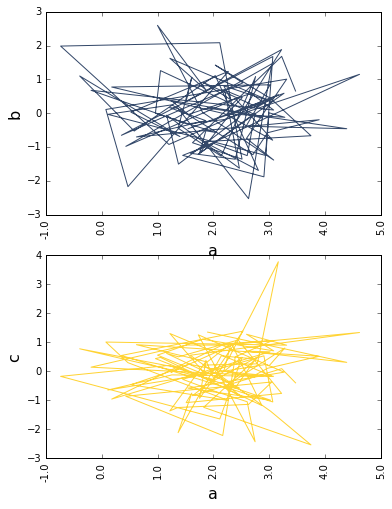

In [52]:
table.select(['a', 'b', 'c']).plot('a')

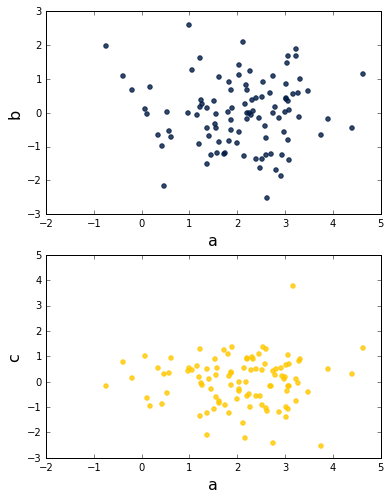

In [53]:
# You can also make scatterplots in a similar fashion
table.select(['a', 'b', 'c']).scatter('a')

However, strings _are_ useful for things like categorical or discrete plots. We can plot these with barplots. E.g.:

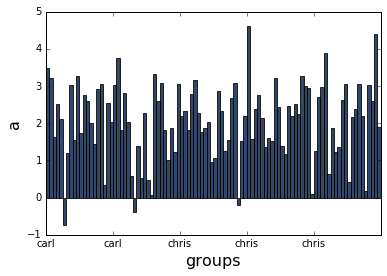

In [54]:
table.select(['a', 'groups']).bar('groups')

That's a bit weird for a barplot - maybe we should aggregate first

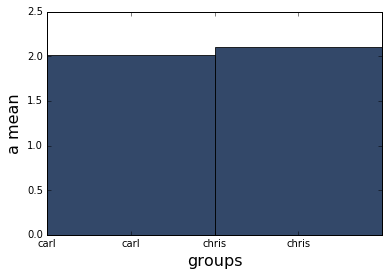

In [55]:
table.select(['a', 'groups']).group('groups', np.mean).bar('groups')

# Pivot tables
Pivot tables are confusing. That is all for now.

# IO
I still haven't figured out how to read/write tables to disk.

Congrats, you made it to the end. Here is a datascientist puppy................on a `Table`.
<img src="http://www.poppymctrouble.com/wp-content/uploads/2009/11/photo.jpg" />